# Representando los estados de un qubit.

Por lo comentado en el tema anterior, ya sabes algo sobre bits y sobre cómo funcionan nuestros conocidos ordenadores digitales. Todas las variables complejas, objetos y estructuras de datos que se utilizan en el software moderno son, básicamente, grandes montones de bits. Los que trabajan en computación cuántica las llaman *variables clásicas* y a los ordenadores que las utilizan, como el que estás usando para leer este artículo, los llamamos *ordenadores clásicos*.

En los ordenadores cuánticos, la variable básica es el _qubit:_ una variante cuántica del bit. Tienen exactamente las mismas restricciones que los bits normales: sólo pueden almacenar una única pieza binaria de información y sólo pueden darnos una salida de "0" o "1". Sin embargo, también pueden manipularse de forma que sólo puede describir la mecánica cuántica. Esto nos da nuevas puertas con las que jugar y nos permite encontrar nuevas formas de diseñar algoritmos.

Para entender bien estas nuevas puertas, primero tenemos que entender cómo se escriben los estados de los qubits. Para ello utilizaremos las matemáticas de vectores, matrices y [números complejos](complejos). Aunque introduciremos estos conceptos a medida que avancemos, lo mejor es que ya te sientas cómodo con ellos. Se pueden encontrar los conceptos necesarios de álgebra matricial <a href="https://qiskit.org/textbook/ch-appendix/linear_algebra.html" target="_blank"> en este enlace (en inglés)</a>.



## 1. Classical vs Quantum Bits <a id="cvsq"></a>

(statevector)=
### Statevectors o vector de estados.

```{index} statevectors
```

En física cuántica utilizamos _vectores de estado_(o statevectors) para describir el estado de nuestro sistema. Digamos que queremos describir la posición de un coche a lo largo de una pista, este es un sistema clásico por lo que podríamos utilizar un número $x$:

![tracking a car with scalars](images/car_1.PNG)

$$ x=4 $$

Alternativamente, podríamos utilizar una colección de números en un vector llamado _vector de estado._ Cada elemento del vector de estado contiene la *probabilidad de encontrar el coche en un lugar determinado*:

![tracking a car with vectors](images/car_2.PNG)

$$
|x\rangle = \begin{bmatrix} 0\\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
            \begin{matrix} \\  \\  \\ \leftarrow \\  \\  \\  \\ \end{matrix}
             \begin{matrix} \\  \\ \text{Probabilidad} \\ \text{coche esté en} \\ \text{posición 4} \\  \\  \\ \end{matrix}   
$$

Esto no se limita a la posición, también podríamos mantener un vector de estado de todas las posibles velocidades que podría tener el coche y todos los posibles colores que pudiera tener. Con los sistemas clásicos (como el ejemplo del coche anterior), esto es una tontería, ya que requiere mantener vectores enormes cuando en realidad sólo necesitamos un número. Pero como veremos en este capítulo, los vectores de estado (statevectors) resultan ser una forma muy buena de llevar la cuenta de los sistemas cuánticos, incluidos los ordenadores cuánticos.


### 1.2 Qubit Notation <a id="notation"></a>

Los bits clásicos siempre tienen un estado completamente bien definido: o son "0" o son "1" en cada momento del cálculo. No podemos añadir más detalles al estado de un bit. Para escribir el estado de un bit clásico (c), basta con utilizar estos dos valores binarios. Por ejemplo:

    c = 0

Esta restricción desaparece en el caso de los bits cuánticos. Para obtener un "0" o un "1" de un qubit, sólo es necesario que esté bien definido cuando se realiza una medición para extraer un resultado. En ese momento, debe comprometerse con una de estas dos opciones. El resto del tiempo, su estado será algo más complejo que un simple valor binario.

Para ver cómo describirlos, podemos centrarnos primero en los dos casos más sencillos. Como vimos en la última sección, es posible preparar un qubit en un estado para el que definitivamente da el resultado `0` cuando se mide.

Necesitamos un nombre para este estado. Seamos poco imaginativos y llamémoslo $0$ . Del mismo modo, existe un estado qubit que tiene la certeza de producir un "1". Lo llamaremos $1$. Estos dos estados se excluyen mutuamente. O bien el qubit da un 0, o bien da un 1. No hay solapamiento. Una forma de representar esto con las matemáticas es utilizar dos vectores ortogonales.


$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}.
$$

Esto es mucha notación para asimilar de golpe. En primer lugar, vamos a desentrañar los extraños símbolos utilizados: $|$ y $\rangle$. Su función consiste básicamente en recordarnos que estamos hablando de los vectores que representan los estados de los qubits etiquetados con $0$ y $1$. Esto nos ayuda a distinguirlos de cosas como los valores de bits 0 y 1 o los números 0 y 1. Forma parte de la *notación bra-ket*, introducida por Dirac.

Si no estás familiarizado con los vectores, puedes pensar en ellos como listas de números que manipulamos siguiendo ciertas reglas. Si estás familiarizado con los vectores por tus clases de física en el instituto, sabrás que estas reglas hacen que los vectores sean muy adecuados para describir cantidades con una magnitud y una dirección. Por ejemplo, la velocidad de un objeto se describe perfectamente con un vector. Sin embargo, la forma en que utilizamos los vectores para los estados cuánticos es ligeramente distinta a ésta, así que no te aferres demasiado a tu intuición anterior. ¡Es hora de hacer algo nuevo!.

Con los vectores podemos describir estados más complejos que $|0\rangle$ y $|1\rangle$. Por ejemplo, consideremos el vector


$$
|q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix} .
$$

Para entender lo que significa este estado, tendremos que utilizar las reglas matemáticas para manipular vectores. En concreto, tendremos que entender cómo sumar vectores y cómo multiplicarlos por escalares.




Como los estados $|0\rangle$ y $|1\rangle$ forman una base ortonormal, podemos representar cualquier vector 2D con una combinación de estos dos estados. Esto nos permite escribir el estado de nuestro qubit en la forma alternativa:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

Este vector, $|q_0\rangle$ se llama _vector de estado_ del qubit, y nos dice todo lo que podemos saber sobre este qubit. Por ahora, sólo podemos sacar algunas conclusiones sencillas sobre este ejemplo particular de vector de estado: no es enteramente $|0\rangle$ ni enteramente $|1\rangle$. En su lugar, se describe mediante una combinación lineal de ambos. En mecánica cuántica, solemos describir este tipo de combinaciones lineales con la palabra "superposición".

Aunque nuestro estado de ejemplo $|q_0\rangle$ puede expresarse como una superposición de $|0\rangle$ y $|1\rangle$, no deja de ser un estado qubit definido y bien definido. Para ver esto, podemos empezar a explorar cómo se puede manipular un qubit.



### Explorando Qubits con Qiskit <a id="exploring-qubits"></a>

En primer lugar, tenemos que importar todas las herramientas que vamos a necesitar:

In [17]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

```{index} QuantumCircuit, Inicializar qubit
```

En Qiskit, utilizamos el objeto `QuantumCircuit` para almacenar nuestros circuitos, esto es esencialmente una lista de las operaciones cuánticas en nuestro circuito y los qubits a los que se aplican.

In [18]:
qc = QuantumCircuit(1) # Creamos un circuito cuántico con un qubit.

```{index} initialize
```

En nuestros circuitos cuánticos, nuestros qubits siempre comienzan por defecto en el estado $|0\rangle$. Podemos utilizar el método `initialize()` para transformar esto en cualquier estado. Le damos a `initialize()` el vector que queremos en forma de lista, y le decimos qué qubit(s) queremos inicializar en este estado:

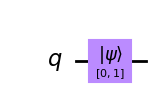

In [19]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw(output='mpl')  # Let's view our circuit

A continuación, podemos utilizar uno de los simuladores de Qiskit para ver el estado resultante de nuestro qubit.

In [20]:
sim = Aer.get_backend('aer_simulator')  # le dice a  Qiskit cómo debe simular el circuito

Para obtener los resultados de nuestro circuito, usamos `run` para ejecutar nuestro circuito, dando el circuito y el backend como argumentos. Luego usamos `.result()` para obtener el resultado de esto:

In [21]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
#qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
#result = sim.run(qobj).result() # Do the simulation and return the result
result = sim.run(qc).result() # Do the simulation and return the result

del `resultado`, podemos obtener el vector de estado final usando `.get_statevector()`:

In [22]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


**Nota:** Python usa `j` para representar $i$ en el caso de los números complejos. En la salida anterior vemos un vector con dos números complejos: `0.+0.j` = 0, and `1.+0.j` = 1.

Midamos ahora nuestro qubit como lo haríamos en un ordenador cuántico real y veamos el resultado:

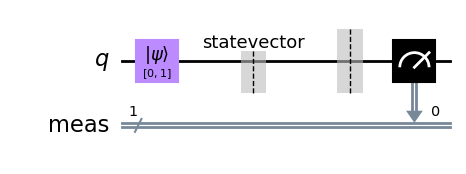

In [23]:
qc.measure_all()
qc.draw(output='mpl')

Esta vez, en lugar del vector estado obtendremos los recuentos de los resultados 0 y 1 utilizando `.get_counts()`:

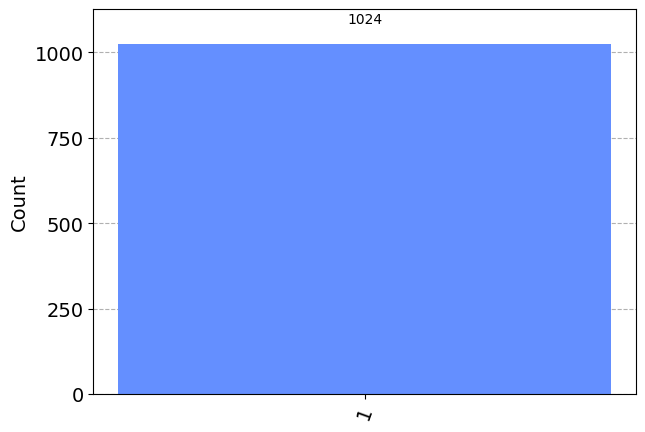

In [24]:
#qobj = assemble(qc)
#result = sim.run(qobj).result()
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

Podemos ver que (como era de esperar) tenemos un 100% de posibilidades de medir $|1\rangle$. Esta vez, pongamos nuestro qubit en superposición y veamos qué ocurre. Usaremos el estado $|q_0\rangle$ de antes en esta sección:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

Necesitamos añadir estas amplitudes a una lista de Python. Para añadir una amplitud compleja, Python utiliza `j` para la unidad imaginaria (normalmente la llamamos "$i$" en términos matemáticos):

In [25]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Definimos el estado |q_0>

Y entonces repetimos los pasos para inicializar el qubit como antes:

In [26]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
#qobj = assemble(qc)
#state = sim.run(qobj).result().get_statevector() # Execute the circuit
state = sim.run(qc).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


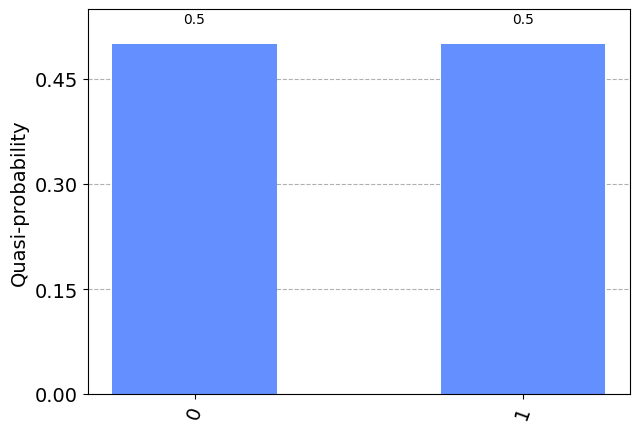

In [27]:
#qobj = assemble(qc)
results = sim.run(qc).result().get_counts()
plot_histogram(results)

Podemos ver que tenemos la misma probabilidad de medir $|0\rangle$ o $|1\rangle$. Para explicar esto, tenemos que hablar de la medición en programación cuántica.

## Reglas de la medición <a id="rules-measurement"></a>

A continuación se comentan una serie de reglas que hay que tener en cuenta en programación cuántica para hacer las mediciones de los estados de los qubits

### Una regla muy importante <a id="important-rule"></a>

Existe una regla simple para la medición de los estados cuánticos. Para encontrar la probabilidad de medir un estado $|\psi \rangle$ en el estado $|x\rangle$ hacemos lo siguiente:

$$p(|x\rangle) = | \langle x| \psi \rangle|^2$$

Los símbolos $\langle$ y $|$ nos dicen que $\langle x |$ es un vector fila y los símbolos $|$ y $\rangle$ nos dicen que $|\psi\rangle$ es un vector columna. En mecánica cuántica llamamos a los vectores columna _kets_ y a los vectores fila _bra._ Juntos forman la notación _bra-ket_. Cualquier ket $|a\rangle$ tiene su correspondiente bra $\langle a|$, y los unos se convierten en los otros utilizando la transpuesta conjugada.


:::{note}
Sabemos que un ket (vector columna) se representa de la siguiente manera:

$$\quad|a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}$$

En el método de transpuesta conjugada, la matriz se transpone y los elementos se convierten en números complejos conjugados (representado por la operación "$*$"), donde el conjugado complejo ("$*$") de un número complejo es un número con una parte real igual y una parte imaginaria igual en magnitud pero de signo opuesto. De este modo se obtiene el correspondiente *bra* (vector fila)  de la siguiente manera:

$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}$$

:::

:::{note}
<h3>Producto interno</h3>   
Hay distintas formas de multiplicar vectores, aquí vamos a explicar en qué consiste el producto interno de dos vectores. En esta guía, utilizamos el producto interior entre un *bra* (vector fila) y un *ket* (vector columna), y sigue esta regla:

$$\langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}$$

y entonces se tiene:

$$ \langle a|b\rangle =a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n$$

   
Vemos que el producto interno de dos vectores *siempre nos da un escalar*. Una cosa útil para recordar es que el producto interno de dos vectores ortogonales es 0, por ejemplo si tenemos los vectores ortogonales $|0\rangle$ y $|1\rangle$:

$$\langle1|0\rangle = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$

Además, recuerde que los vectores $|0\rangle$ y $|1\rangle$ también están normalizados (las magnitudes son iguales a 1):

$$
      \begin{aligned} 
      \langle0|0\rangle & = \begin{bmatrix} 1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 1 \\
      \langle1|1\rangle & = \begin{bmatrix} 0 & 1\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = 1
      \end{aligned}
$$

:::

En la ecuación anterior, $|x\rangle$ puede ser cualquier estado qubit. Para hallar la probabilidad de medir $|x\rangle$, tomamos el producto interno de $|x\rangle$ y el estado que estamos midiendo (en este caso $|\psi\rangle$), y elevamos la magnitud al cuadrado. Esto puede parecer un poco enrevesado, pero pronto se convertirá en algo natural.

Si nos fijamos en el estado $|q_0\rangle$ de antes, podemos ver que la probabilidad de medir $|0\rangle$ es efectivamente 0,5$:         

$$
\begin{aligned}
|q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
\langle 0| q_0 \rangle  & = \tfrac{1}{\sqrt{2}}\langle 0|0\rangle + \tfrac{i}{\sqrt{2}}\langle 0|1\rangle \\
& = \tfrac{1}{\sqrt{2}}\cdot 1 +  \tfrac{i}{\sqrt{2}} \cdot 0\\
& = \tfrac{1}{\sqrt{2}}\\
|\langle 0| q_0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

Debes verificar la probabilidad de medir $|1\rangle$ como ejercicio.

Esta regla establece cómo obtenemos información de los estados cuánticos. Por tanto, es muy importante para todos los que hacemos en computación cuántica. También implica de inmediato varios hechos importantes, que vemos en el siguiente apartado.




### Implicaciones de esta norma <a id="implications"></a>

A continuación pasamos a ver cuales son las implicaciones a las que se hace mención en el párrafo anterior. 

### Normalización.

La regla nos muestra que las amplitudes están relacionadas con las probabilidades. Si queremos que las probabilidades sumen 1 (¡y así debe ser!), tenemos que asegurarnos de que el vector de estado está correctamente normalizado. En concreto, necesitamos que la magnitud del vector de estado sea 1.



$$ \langle\psi|\psi\rangle = 1 \\ $$

Entonces si:

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle $$

Se tiene que:

$$ |\alpha|^2 + |\beta|^2 = 1 $$

Esto explica los factores de $\sqrt{2}$ que has visto a lo largo de este capítulo. De hecho, si intentamos dar a `initialize()` un vector que no esté normalizado, nos dará un error, como se puede ver en el código siguiente:


In [28]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared is not 1, but 1.4142135623730951.'

#### Quick Ejercicios

1. Crear un vector de estado que dará una probabilidad de $1/3$ de medir $|0\rangle$.


2. Crear un vector de estado diferente que dará las mismas probabilidades de medición.


3. Verificar que la probabilidad de medir $|1\rangle$ para estos dos estados es de $2/3$.

Puedes comprobar tu respuesta en el widget de abajo (acepta respuestas con ±1% de precisión, puedes usar términos numpy como `pi` y `sqrt()` en el vector):

In [29]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

### Medición alternativa​.

La regla de medida nos da la probabilidad $p(|x\rangle)$ de que un estado $|\psi\rangle$ se mida como $|x\rangle$. En ninguna parte nos dice que $|x\rangle$ sólo puede ser $|0\rangle$ o $|1\rangle$.

Las medidas que hemos considerado hasta ahora son, de hecho, sólo una de las infinitas formas posibles de medir un qubit. Para cualquier par ortogonal de estados, podemos definir una medida que haga que un qubit elija entre los dos.

Esta posibilidad se estudiará más a fondo en la siguiente sección. Por ahora, sólo hay que tener en cuenta que $|x\rangle$ no se limita a ser simplemente $|0\rangle$ o $|1\rangle$.



### Fase global.

Sabemos que medir el estado $|1\rangle$ nos dará la salida `1` con certeza. Pero también somos capaces de escribir estados como​ el siguiente: 

$$\begin{bmatrix}0 \\ i\end{bmatrix} = i|1\rangle.$$

Para ver cómo se comporta, aplicamos la regla de la medida vista anteriormente.

$$ |\langle x| (i|1\rangle) |^2 = | i \langle x|1\rangle|^2 = |\langle x|1\rangle|^2 $$

Aquí encontramos que el factor de $i$ desaparece una vez que tomamos la magnitud del número complejo. Este efecto es completamente independiente del estado medido $|x\rangle$. No importa qué medida estemos considerando, las probabilidades para el estado $i|1\rangle$ son idénticas a las de $|1\rangle$. Dado que las mediciones son la única forma de extraer información de un qubit, esto implica que estos dos estados son equivalentes en todos los aspectos físicamente relevantes.

De forma más general, nos referimos a cualquier factor global $\gamma$ sobre un estado para el que $|\gamma|=1$ como una "fase global". *Los estados que difieren sólo por una fase global son físicamente indistinguibles*.


$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$

Nótese que esto es distinto de la diferencia de fase _entre_ los términos de una superposición, que se conoce como "fase relativa". Esto adquiere relevancia cuando consideramos distintos tipos de medición y múltiples qubits.


### El efecto observado.

Sabemos que las amplitudes contienen información sobre la probabilidad de que encontremos el qubit en un estado específico, pero una vez que hemos medido el qubit, sabemos con certeza cuál es el estado del qubit. Por ejemplo, si medimos un qubit en el estado

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle$$

Y encontrarlo en el estado $|0\rangle$, si volvemos a medir, hay un 100% de posibilidades de encontrar el qubit en el estado $|0\rangle$. Esto significa que el acto de medir _cambia_ el estado de nuestros qubits.


$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure }|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

A este efecto se le suele llamar "colapsar" el estado del qubit. Se trata de un efecto muy potente que debe utilizarse con prudencia. Por ejemplo, si midiéramos constantemente cada uno de nuestros qubits para controlar su valor en cada punto de un cálculo, siempre estarían en un estado bien definido de $|0\rangle$ o $|1\rangle$. Como tales, no se diferenciarían de los bits clásicos y nuestra computación podría sustituirse fácilmente por una computación clásica. Para lograr una computación verdaderamente cuántica debemos permitir que los qubits exploren estados más complejos. Por tanto, las mediciones sólo se utilizan cuando necesitamos extraer un resultado. Esto significa que solemos colocar todas las mediciones *al final de nuestro circuito cuántico*.

Podemos demostrarlo utilizando el simulador de vectores de estado de Qiskit. Inicialicemos un qubit en superposición:


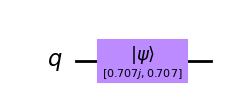

In [30]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw(output='mpl')

Esto debería inicializar nuestro qubit en el estado:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

Podemos comprobarlo con el simulador:

In [31]:
qc.save_statevector()
#result = sim.run(assemble(qc)).result()
result = sim.run(qc).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


Podemos ver aquí que el qubit se inicializa en el estado `[0.+0.70710678j 0.70710678+0.j]`, como esperábamos.

Creemos ahora un circuito en el que midamos este qubit:

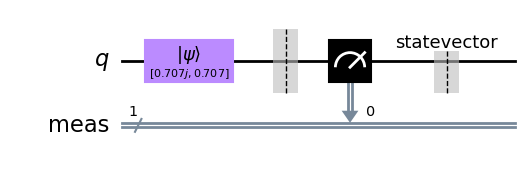

In [32]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw(output='mpl')

Cuando simulamos este circuito completo, podemos ver que una de las amplitudes es siempre 0:

In [33]:
#qobj = assemble(qc)
#state = sim.run(qobj).result().get_statevector()
state = sim.run(qc).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


Puedes volver a ejecutar esta celda unas cuantas veces para reinicializar el qubit y medirlo de nuevo. Observarás que cualquiera de los dos resultados es igualmente probable, pero que el estado del qubit nunca es una superposición de $|0\rangle$ y $|1\rangle$. Curiosamente, la fase global en el estado $|0\rangle$ sobrevive, pero como se trata de una fase global, nunca podremos medirla en un ordenador cuántico real.

###  Una nota sobre los simuladores cuánticos.

Podemos ver que escribir el estado de un qubit requiere llevar la cuenta de dos números complejos, pero al utilizar un ordenador cuántico real sólo recibiremos una respuesta de sí o no (`0` o `1`) para cada qubit. La salida de un ordenador cuántico de 10 qubits tendrá este aspecto:

`0110111110`

Sólo 10 bits, sin superposición ni amplitudes complejas. Cuando utilizamos un ordenador cuántico real, no podemos ver los estados de nuestros qubits a mitad del cálculo, ¡ya que los destruiríamos!. Este comportamiento no es ideal para el aprendizaje, por lo que Qiskit proporciona diferentes simuladores cuánticos: Por defecto, el `aer_simulator` imita la ejecución de un ordenador cuántico real, pero también te permitirá echar un vistazo a los estados cuánticos antes de la medición si incluimos ciertas instrucciones en nuestro circuito. Por ejemplo, aquí hemos incluido la instrucción `.save_statevector()`, lo que significa que podemos usar `.get_statevector()` sobre el resultado de la simulación. 




## La esfera de  Bloch  <a id="bloch-sphere"></a>

Un elemento muy importante para representar qubit es la denominada esfera de Bloch que a continuación se pasa a presentar.

### Describiendo los estados de un qubit. <a id="bloch-sphere-1"></a>

Hemos visto anteriormente en este capítulo que el estado general de un qubit ($|q\rangle$) es:

$$
|q\rangle = \alpha|0\rangle + \beta|1\rangle
$$

$$
\alpha, \beta \in \mathbb{C}
$$

(La segunda línea nos dice que $\alpha$ y $\beta$ son números complejos). Las dos primeras implicaciones de la sección 2 nos dicen que no podemos diferenciar entre algunos de estos estados. Esto significa que podemos ser más específicos en nuestra descripción del qubit.

En primer lugar, como no podemos medir la fase global, sólo podemos medir la diferencia de fase entre los estados $|0\rangle$ y $|1\rangle$. En lugar de que $\alpha$ y $\beta$ sean complejos, podemos limitarlos a los números reales y añadir un término que nos diga la fase relativa entre ellos:


$$
|q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle
$$

$$
\alpha, \beta, \phi \in \mathbb{R}
$$

Por último, dado que el estado del qubit debe estar normalizado, i.e.

$$
\sqrt{\alpha^2 + \beta^2} = 1
$$

Podemos usar la identidad trigonométrica:

$$
\sqrt{\sin^2{x} + \cos^2{x}} = 1
$$

para describir los reales $\alpha$ y $\beta$ en términos de una variable, $\theta$:

$$
\alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}}
$$

A partir de aquí podemos describir el estado de cualquier qubit utilizando las dos variables $\phi$ y $\theta$:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

$$
\theta, \phi \in \mathbb{R}
$$

### Representación visual del estado de un qubit. <a id="bloch-sphere-2"></a>

Queremos trazar el estado general de nuestro qubit:

$$
|q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$

Si interpretamos $\theta$ y $\phi$ como coordenadas esféricas ($r = 1$, ya que la magnitud del estado qubit es $1$), podemos representar cualquier estado qubit individual en la superficie de una esfera, conocida como la esfera _Bloch_.

A continuación hemos representado un qubit en el estado $|{+}\rangle$. En este caso, $\theta = \pi/2$ y $\phi = 0$.

Qiskit tiene una función para trazar una esfera Bloch, `plot_bloch_vector()`. Esta función acepta coordenadas cartesianas por defecto, pero también puede aceptar coordenadas esféricas pasando el argumento `coord_type='spherical'.`


También se puede consultar <a href="https://javafxpert.github.io/grok-bloch/" target="_blank"> esta interactiva esfera de Bloch</a> .

Desde qiskit podemos hacer esta representación de la siguiente manera.

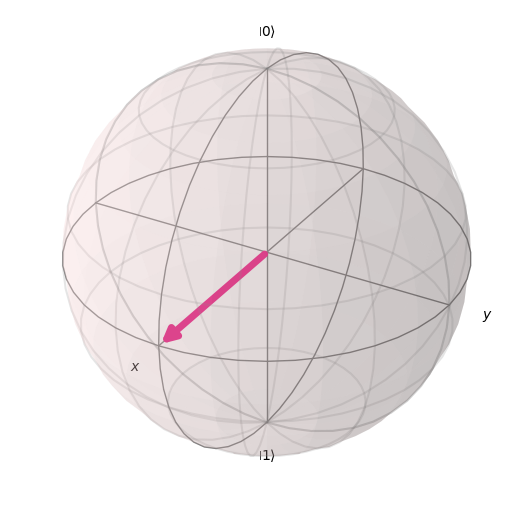

In [34]:
from qiskit.visualization import plot_bloch_vector
coords = [1,pi/2,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

#### Nota aclaratoria.

Cuando se aprende por primera vez sobre los estados de los qubits, es fácil confundir el _vector de estado_ de los qubits con su _vector Bloch_. Recuerda que el vector de estado es el vector del que hablamos al principio de este apartado, que contiene las amplitudes de los dos estados en los que puede estar nuestro qubit. El vector de Bloch es una herramienta de visualización que mapea el vector de estado complejo 2D en un espacio real 3D.



#### Quick Ejercicios
Utilizar `plot_bloch_vector()` para dibujar un qubit en los siguientes estados:
1. $|0\rangle$

2. $|1\rangle$

3. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$

4. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$

5. $\tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix}$

In [35]:
import qiskit.tools.jupyter
%qiskit_version_table